In [1]:
import pandas as pd 
import numpy as np
import geopandas as gp
%matplotlib inline

/Users/Henrilin28/.pyenv/versions/2.7.8/envs/virtual_2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [34]:
df1 = pd.read_csv("merged.csv",index_col=0)

In [39]:
df1.head(5)

,BoroCT2010,homeless311_comp,Crime,homeless_shelters,Area,Capacity,adult_samehome_tract,aframer_pop_tract,aframer_total_pop_tract,age_pyramid_female_15_to_24_tract,...,retail_trade_industries_tract,sales_and_office_occupations_tract,self_employed_class_tract,service_occupations_tract,transportation_warehousing_utilities_industries_tract,unemployment_tract,unpaid_family_workers_class_tract,wholesale_trade_industries_tract,working_poor_tract,Total_cap
0,5000900,8,129,0,2.497010e+06,0.0,87.308534,39.449541,774.0,172.0,...,8.663366,21.782178,5.074257,22.896040,12.995050,5.790960,0.5,9.529703,3.836634,0.0
1,5007400,1,124,0,5.788238e+06,0.0,98.185643,0.571429,27.0,270.0,...,11.291822,21.514870,8.224907,28.624535,5.901487,5.554120,0.0,6.737918,5.669145,0.0
2,1009800,112,217,2,1.906016e+06,185.0,88.050222,1.631412,118.0,601.0,...,10.755993,31.878713,6.146282,5.121901,0.799017,2.078420,0.0,0.799017,0.614628,370.0
3,1010000,249,361,0,1.860938e+06,0.0,76.261128,1.204819,22.0,61.0,...,6.688155,22.481869,4.109589,4.512490,7.252216,4.350382,0.0,5.479452,6.204674,0.0
4,1010200,365,177,0,1.860993e+06,0.0,95.555556,1.777778,4.0,14.0,...,10.294118,16.176471,33.823529,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [ ]:
df1.columns.v

In [40]:
df1["Total_cap"] = df1["homeless_shelters"]*df1["Capacity"]


In [42]:
df3 = df1.copy()
nyu_hc = pd.read_csv("nyc.csv",encoding="utf-8",index_col=0)

In [45]:
df3.head(5)

,BoroCT2010,homeless311_comp,Crime,homeless_shelters,Area,Capacity,adult_samehome_tract,aframer_pop_tract,aframer_total_pop_tract,age_pyramid_female_15_to_24_tract,...,retail_trade_industries_tract,sales_and_office_occupations_tract,self_employed_class_tract,service_occupations_tract,transportation_warehousing_utilities_industries_tract,unemployment_tract,unpaid_family_workers_class_tract,wholesale_trade_industries_tract,working_poor_tract,Total_cap
0,5000900,8,129,0,2.497010e+06,0.0,87.308534,39.449541,774.0,172.0,...,8.663366,21.782178,5.074257,22.896040,12.995050,5.790960,0.5,9.529703,3.836634,0.0
1,5007400,1,124,0,5.788238e+06,0.0,98.185643,0.571429,27.0,270.0,...,11.291822,21.514870,8.224907,28.624535,5.901487,5.554120,0.0,6.737918,5.669145,0.0
2,1009800,112,217,2,1.906016e+06,185.0,88.050222,1.631412,118.0,601.0,...,10.755993,31.878713,6.146282,5.121901,0.799017,2.078420,0.0,0.799017,0.614628,370.0
3,1010000,249,361,0,1.860938e+06,0.0,76.261128,1.204819,22.0,61.0,...,6.688155,22.481869,4.109589,4.512490,7.252216,4.350382,0.0,5.479452,6.204674,0.0
4,1010200,365,177,0,1.860993e+06,0.0,95.555556,1.777778,4.0,14.0,...,10.294118,16.176471,33.823529,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [47]:
df4 = df3.merge(nyu_hc[["BoroCT2010","hotcold"]],on="BoroCT2010",how="inner")

In [74]:
agg = df4
for y in agg.columns:
    if(agg[y].dtype == 'object'):
        agg[y] = pd.to_numeric(agg[y].str.strip())


In [75]:
df4.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2165
Columns: 172 entries, BoroCT2010 to target
dtypes: float64(167), int64(5)
memory usage: 2.9 MB


In [133]:
df4.columns.values

array(['BoroCT2010', 'homeless311_comp', 'Crime', 'homeless_shelters',
       'Area', 'Capacity', 'adult_samehome_tract', 'aframer_pop_tract',
       'aframer_total_pop_tract', 'age_pyramid_female_15_to_24_tract',
       'age_pyramid_female_25_to_34_tract',
       'age_pyramid_female_35_to_44_tract',
       'age_pyramid_female_45_to_54_tract',
       'age_pyramid_female_5_to_14_tract',
       'age_pyramid_female_55_to_64_tract',
       'age_pyramid_female_65_to_74_tract',
       'age_pyramid_female_75_to_84_tract',
       'age_pyramid_female_85_plus_tract',
       'age_pyramid_female_under_5_tract',
       'age_pyramid_male_15_to_24_tract',
       'age_pyramid_male_25_to_34_tract',
       'age_pyramid_male_35_to_44_tract',
       'age_pyramid_male_45_to_54_tract', 'age_pyramid_male_5_to_14_tract',
       'age_pyramid_male_55_to_64_tract',
       'age_pyramid_male_65_to_74_tract',
       'age_pyramid_male_75_to_84_tract', 'age_pyramid_male_85_plus_tract',
       'age_pyramid_male_under_

In [132]:
df4.groupby("hotcold").size()

hotcold
0    1594
1      93
2      50
3     260
4     169
dtype: int64

In [205]:
agg["target"] = agg["hotcold"].map({3: "1", 2: "1", 1: "0", 4: "1",0:"0"})

In [212]:
agg["target"]

0       0
1       1
2       1
3       1
4       0
5       0
6       0
7       1
8       0
9       1
10      1
11      1
12      0
13      0
14      0
15      1
16      0
17      1
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2136    0
2137    0
2138    0
2139    0
2140    0
2141    0
2142    1
2143    0
2144    0
2145    0
2146    0
2147    0
2148    0
2149    0
2150    0
2151    0
2152    0
2153    0
2154    0
2155    0
2156    0
2157    0
2158    0
2159    0
2160    0
2161    0
2162    0
2163    0
2164    0
2165    0
Name: target, dtype: object

In [160]:
data = agg.drop(["hotcold","Total_cap","target","BoroCT2010"],axis=1).fillna(0)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2165
Columns: 169 entries, BoroCT2010 to working_poor_tract
dtypes: float64(165), int64(4)
memory usage: 2.8 MB


In [159]:
data.head(5)

,BoroCT2010,homeless311_comp,Crime,homeless_shelters,Area,Capacity,adult_samehome_tract,aframer_pop_tract,aframer_total_pop_tract,age_pyramid_female_15_to_24_tract,...,publicassist_tract,retail_trade_industries_tract,sales_and_office_occupations_tract,self_employed_class_tract,service_occupations_tract,transportation_warehousing_utilities_industries_tract,unemployment_tract,unpaid_family_workers_class_tract,wholesale_trade_industries_tract,working_poor_tract
0,5000900,8,129,0,2.497010e+06,0.0,87.308534,39.449541,774.0,172.0,...,10.287443,8.663366,21.782178,5.074257,22.896040,12.995050,5.790960,0.5,9.529703,3.836634
1,5007400,1,124,0,5.788238e+06,0.0,98.185643,0.571429,27.0,270.0,...,3.903346,11.291822,21.514870,8.224907,28.624535,5.901487,5.554120,0.0,6.737918,5.669145
2,1009800,112,217,2,1.906016e+06,185.0,88.050222,1.631412,118.0,601.0,...,1.261604,10.755993,31.878713,6.146282,5.121901,0.799017,2.078420,0.0,0.799017,0.614628
3,1010000,249,361,0,1.860938e+06,0.0,76.261128,1.204819,22.0,61.0,...,1.396878,6.688155,22.481869,4.109589,4.512490,7.252216,4.350382,0.0,5.479452,6.204674
4,1010200,365,177,0,1.860993e+06,0.0,95.555556,1.777778,4.0,14.0,...,0.000000,10.294118,16.176471,33.823529,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [202]:
target = agg["target"].fillna(0)

In [209]:
from pandas import read_csv
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest


# load data
X = data
Y = target.fillna(0).astype(int)
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
#estimators.append(('feature_union', feature_union))
#estimators.append(('pca', PCA(n_components=3)))
estimators.append(('select_best', SelectKBest(k=6)))
estimators.append(('randomforest', RandomForestClassifier(n_jobs=100)))
estimators.append(('svm', svm.SVC()))

model = Pipeline(estimators)
# evaluate pipeline
num_folds = 10
num_instances = len(X)
seed = 7
kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
#print "\t{}".format(X_train.columns[cv.get_support()])

/Users/Henrilin28/.pyenv/versions/2.7.8/envs/virtual_2.7/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning:

Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.

/Users/Henrilin28/.pyenv/versions/2.7.8/envs/virtual_2.7/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning:

Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.

/Users/Henrilin28/.pyenv/versions/2.7.8/envs/virtual_2.7/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning:

Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.

/Users/Henrilin28/.pyenv/versions/2.7.8/envs/virtual_2.7/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning:

Function tra

[ 0.75576037  0.73271889  0.70506912  0.71428571  0.73271889  0.75576037
  0.77314815  0.72222222  0.68518519  0.76388889]


In [213]:
Y = agg["target"]
Y

0       0
1       1
2       1
3       1
4       0
5       0
6       0
7       1
8       0
9       1
10      1
11      1
12      0
13      0
14      0
15      1
16      0
17      1
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2136    0
2137    0
2138    0
2139    0
2140    0
2141    0
2142    1
2143    0
2144    0
2145    0
2146    0
2147    0
2148    0
2149    0
2150    0
2151    0
2152    0
2153    0
2154    0
2155    0
2156    0
2157    0
2158    0
2159    0
2160    0
2161    0
2162    0
2163    0
2164    0
2165    0
Name: target, dtype: object

In [234]:
import sklearn.pipeline

std =  StandardScaler()
select = sklearn.feature_selection.SelectKBest(k=100)
clf = sklearn.ensemble.RandomForestClassifier()

steps = [(('normalize'),std), ('feature_selection', select),
        ('randomforest', RandomForestClassifier(n_jobs=100, n_estimators=100, min_samples_split=10))]

pipeline = sklearn.pipeline.Pipeline(steps)

X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, Y, test_size=0.33, random_state=42)

### fit your pipeline on X_train and y_train
pipeline.fit( X_train, y_train )
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = pipeline.predict( X_test )
### test your predictions using sklearn.classification_report()
report = sklearn.metrics.classification_report( y_test, y_prediction )
### and print the report
print(report)

             precision    recall  f1-score   support

          0       0.84      0.97      0.90       548
          1       0.82      0.38      0.52       167

avg / total       0.83      0.83      0.81       715



In [125]:
select

SelectKBest(k=20, score_func=<function f_classif at 0x114283500>)

In [233]:
import sklearn.grid_search


parameters = dict(feature_selection__k=[10,100], 
              random_forest__n_estimators=[50, 100, 200],
              random_forest__min_samples_split=[2, 3, 4, 5, 10])

cv = sklearn.grid_search.GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_predictions = cv.predict(X_test)
report = sklearn.metrics.classification_report( y_test, y_predictions )

ValueError: Invalid parameter random_forest for estimator Pipeline(steps=[('normalize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('feature_selection', SelectKBest(k=10, score_func=<function f_classif at 0x114283500>)), ('randomforest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_featu...ators=10, n_jobs=100, oob_score=False,
            random_state=None, verbose=0, warm_start=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [128]:
print(report)

             precision    recall  f1-score   support

        0.0       0.90      0.98      0.94       638
        1.0       0.50      0.12      0.19        17
        3.0       0.39      0.12      0.18        60

avg / total       0.85      0.89      0.86       715



In [ ]:
da

/Users/Henrilin28/.pyenv/versions/2.7.8/envs/virtual_2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



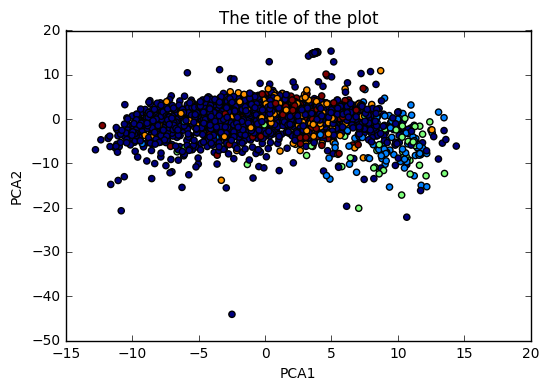

In [201]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.mlab import PCA
#construct your numpy array of data
#data = 
data = agg.drop(["hotcold","Total_cap","target","BoroCT2010"],axis=1).fillna(0)
myData = np.array(data) 
result = PCA(myData) 

#this will return an array of variance percentages for each component
result.fracs

#this will return a 2d array of the data projected into PCA space
result.Y 




x = []
y = []
z = []
for item in result.Y:
    x.append(item[0])
    y.append(item[1])
    z.append(item[2])

plt.close('all') # close all latent plotting windows
fig1 = plt.figure() # Make a plotting figure
#ax = Axes3D(fig1) # use the plotting figure to create a Axis3D object.

#pltData = [x,y,z] 
pltData = [x,y]
#ax.scatter(pltData[0], pltData[1], pltData[2], 'o', c=agg["hotcold"], ) # make a scatter plot of blue dots from the data
plt.scatter(pltData[0], pltData[1],marker='o', c=agg["hotcold"] ) # make a scatter plot of blue dots from the data
 
# make simple, bare axis lines through space:
# xAxisLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) # 2 points make the x-axis line at the data extrema along x-axis 
# ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r') # make a red line for the x-axis.
# yAxisLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) # 2 points make the y-axis line at the data extrema along y-axis
# ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'g') # make a red line for the y-axis.
# zAxisLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2]))) # 2 points make the z-axis line at the data extrema along z-axis
# ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'k') # make a red line for the z-axis.
 
# label the axes 
plt.xlabel("PCA1") 
plt.ylabel("PCA2")
# ax.set_zlabel("PCA3")
plt.title("The title of the plot")
plt.legend()
plt.show() # show the plot

In [179]:
df6 = pd.DataFrame([x,y,z])

In [185]:
plot_df = df6.T

plot_df["hot/cold"] = agg["hotcold"]
plot_df["BoroCT2010"] = agg["BoroCT2010"]
plot_df = plot_df.rename(columns={0:"x",1:"y",2:"z"})

In [186]:
for key,df in plot_df.groupby("hot/cold"):
    print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594 entries, 0 to 2165
Data columns (total 5 columns):
x             1594 non-null float64
y             1594 non-null float64
z             1594 non-null float64
hot/cold      1594 non-null int64
BoroCT2010    1594 non-null int64
dtypes: float64(3), int64(2)
memory usage: 74.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 4 to 2155
Data columns (total 5 columns):
x             93 non-null float64
y             93 non-null float64
z             93 non-null float64
hot/cold      93 non-null int64
BoroCT2010    93 non-null int64
dtypes: float64(3), int64(2)
memory usage: 4.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 2 to 2142
Data columns (total 5 columns):
x             50 non-null float64
y             50 non-null float64
z             50 non-null float64
hot/cold      50 non-null int64
BoroCT2010    50 non-null int64
dtypes: float64(3), int64(2)
memory usage: 2.3 KB
None
<class 'pand

In [191]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

data = []
for key, df in plot_df.groupby("hot/cold"):
    trace1 = go.Scatter3d(
        x=df.x,
        y=df.y,
        z=df.z,
        name = df["hot/cold"],
        text = df["BoroCT2010"],
        mode='markers',
        marker=dict(
            size=3,
            color=df["hot/cold"],                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.8
        )
    )
    data.append(trace1)
#data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    title="Hot Cold Spot PCA Result"
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

/Users/Henrilin28/.pyenv/versions/2.7.8/envs/virtual_2.7/lib/python2.7/site-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings



In [166]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/alpha_shape.csv')
df.head()


,x,y,z
0,-5.933556,-6.659582,-2.337235
1,-5.699621,-5.089488,-2.206949
2,-5.650399,-4.378679,-2.672846
3,-5.526566,-5.295158,-1.849260
4,-6.368754,-5.650205,-1.165898


In [168]:
import plotly.plotly as py
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/alpha_shape.csv')
#df.head()

scatter = dict(
    mode = "markers",
    name = agg["BoroCT2010"],
    type = "scatter3d",    
    x = x, y = y, z = z,
    marker = dict( size=2, color="rgb(23, 190, 207)" )
)
clusters = dict(
    alphahull = 7,
    name = agg["BoroCT2010"],
    opacity = 0.1,
    type = "mesh3d",    
    x = x, y = y, z = z
)
layout = dict(
    title = '3d point clustering',
    scene = dict(
        xaxis = dict( zeroline=False ),
        yaxis = dict( zeroline=False ),
        zaxis = dict( zeroline=False ),
    )
)
fig = dict( data=[scatter, clusters], layout=layout )
# Use py.iplot() for IPython notebook
py.iplot(fig, filename='3d point clustering')

/Users/Henrilin28/.pyenv/versions/2.7.8/envs/virtual_2.7/lib/python2.7/site-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings



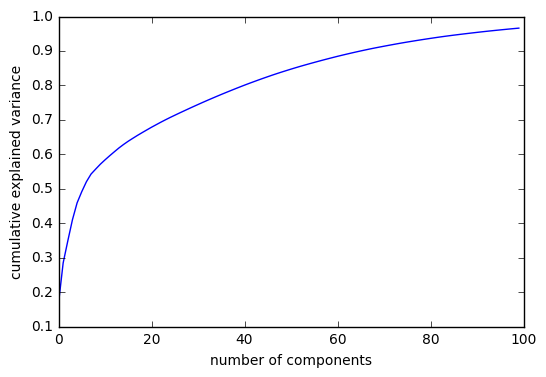

In [229]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=100).fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

(array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.27038267e-10,   9.99062403e-02,   1.99812481e-01,
          2.99718721e-01,   3.99624961e-01,   4.99531201e-01,
          5.99437441e-01,   6.99343681e-01,   7.99249922e-01,
          8.99156162e-01,   9.99062402e-01]),
 <a list of 10 Patch objects>)

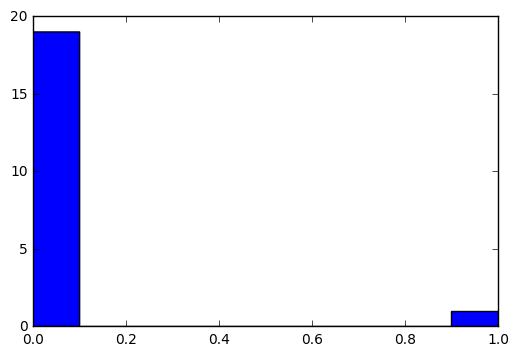

In [222]:
plt.hist(pca.explained_variance_ratio_ )